# Import modules

In [1]:
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
df = pd.read_csv('Dataset.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
# datatypes of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
# check unique values in dataset
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

# Preprocessing the dataset


In [6]:
# check for null values
print('Does it has Null Values\n',df.isnull().any(),"\n")
print('Count of Null Values:\n',df.isnull().sum())

Does it has Null Values
 Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool 

Count of Null Values:
 Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


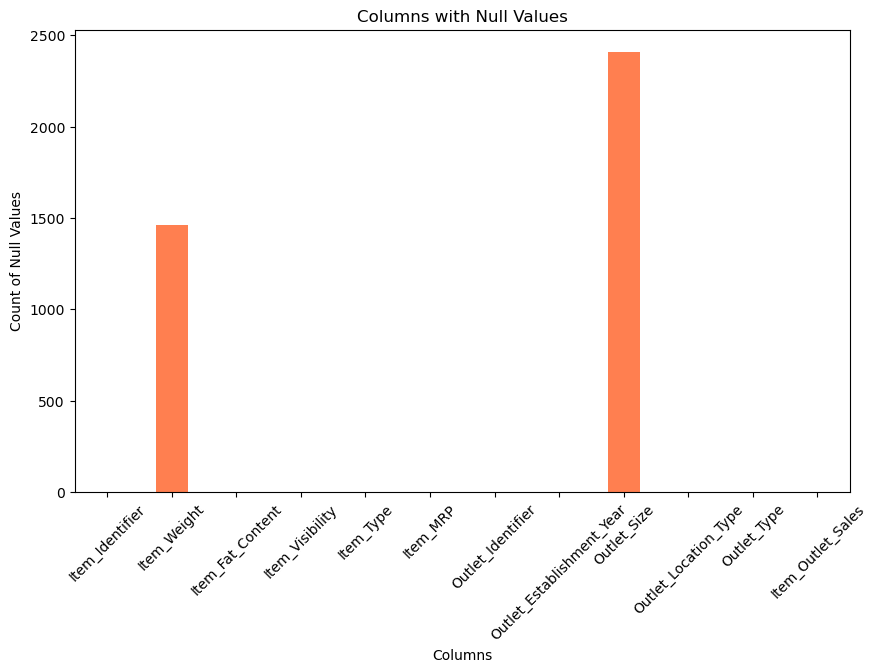

In [7]:
null_counts = df.isnull().sum()

# Create a bar graph to visualize null values
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar', color='coral')
plt.title('Columns with Null Values')
plt.xlabel('Columns')
plt.ylabel('Count of Null Values')
plt.xticks(rotation=45)
plt.show()

In [8]:
df.skew()

Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

In [9]:
df.Item_Weight = df.Item_Weight.fillna(df.Item_Weight.mean())
df.Item_Weight.isnull().any()

False

In [10]:
# checking for catagorical data 
obj_df = df.select_dtypes(include = 'object')
obj_df

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [11]:
# removing id inside the table column
obj_df = obj_df.drop(columns=["Item_Identifier","Outlet_Identifier"],axis=1)
obj_df

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,NaN,Tier 3,Grocery Store
4,Low Fat,Household,High,Tier 3,Supermarket Type1
...,...,...,...,...,...
8518,Low Fat,Snack Foods,High,Tier 3,Supermarket Type1
8519,Regular,Baking Goods,NaN,Tier 2,Supermarket Type1
8520,Low Fat,Health and Hygiene,Small,Tier 2,Supermarket Type1
8521,Regular,Snack Foods,Medium,Tier 3,Supermarket Type2


In [12]:
# print the categorical columns
for col in obj_df:
    print(col)
    print(df[col].value_counts())
    print('------')

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
------
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
------
Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
------
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64
------
Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: 

In [13]:
# combine item fat content
df.Item_Fat_Content = df.Item_Fat_Content.replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [14]:
outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [15]:
miss_bool = df['Outlet_Size'].isnull()
df.loc[miss_bool, 'Outlet_Size'] = df.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
df.Outlet_Size.value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [16]:
num_df = df.select_dtypes(include=['int','float'])
num_df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


Text(0.5, 1.0, 'Item Weight Distribution by Fat Content')

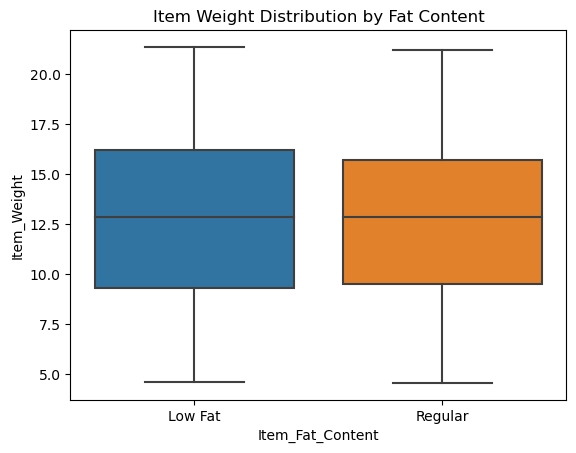

In [17]:
sns.boxplot(data=df, x='Item_Fat_Content', y='Item_Weight')
plt.title('Item Weight Distribution by Fat Content')

In [18]:
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']
df['Outlet_Years'].unique()

array([14,  4, 15, 26, 28, 11,  6, 16,  9], dtype=int64)

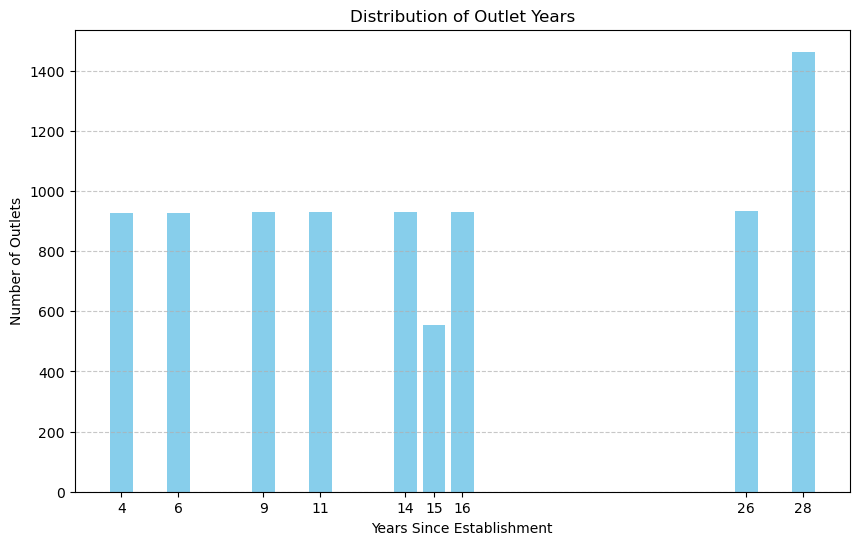

In [19]:
year_counts = df['Outlet_Years'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(year_counts.index, year_counts.values, color='skyblue')
plt.title('Distribution of Outlet Years')
plt.xlabel('Years Since Establishment')
plt.ylabel('Number of Outlets')
plt.xticks(year_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [20]:
sum(df['Item_Visibility']==0)

526

In [21]:
# replace zeros with mean
df.loc[:, 'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()], inplace=True)
sum(df['Item_Visibility']==0)

0

In [22]:
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [23]:
df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [24]:
df.loc[df['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

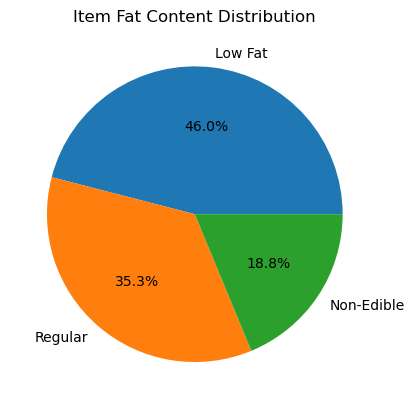

In [25]:
item_fat_content_counts = df['Item_Fat_Content'].value_counts()
plt.pie(item_fat_content_counts, labels=item_fat_content_counts.index, autopct='%1.1f%%')
plt.title('Item Fat Content Distribution')
plt.show()

In [26]:
df1 = df.copy()
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,New_Item_Type
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,Food
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4,Drinks
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14,Food
3,FDX07,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,15,Food
4,NCD19,8.930,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26,Non-Consumable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,26,Food
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850,11,Food
8520,NCJ29,10.600,Non-Edible,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,9,Non-Consumable
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,4,Food


In [27]:
# removing id inside the table column
df1 = df1.drop(columns=["Item_Type","Item_Identifier","Outlet_Identifier","Outlet_Establishment_Year"],axis=1)
df1

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,New_Item_Type
0,9.300,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,14,Food
1,5.920,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,4,Drinks
2,17.500,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,14,Food
3,19.200,Regular,0.066132,182.0950,Small,Tier 3,Grocery Store,732.3800,15,Food
4,8.930,Non-Edible,0.066132,53.8614,High,Tier 3,Supermarket Type1,994.7052,26,Non-Consumable
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,214.5218,High,Tier 3,Supermarket Type1,2778.3834,26,Food
8519,8.380,Regular,0.046982,108.1570,Small,Tier 2,Supermarket Type1,549.2850,11,Food
8520,10.600,Non-Edible,0.035186,85.1224,Small,Tier 2,Supermarket Type1,1193.1136,9,Non-Consumable
8521,7.210,Regular,0.145221,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976,4,Food


In [28]:
str_df = df1.select_dtypes(include=['object'])
str_df

,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type
0,Low Fat,Medium,Tier 1,Supermarket Type1,Food
1,Regular,Medium,Tier 3,Supermarket Type2,Drinks
2,Low Fat,Medium,Tier 1,Supermarket Type1,Food
3,Regular,Small,Tier 3,Grocery Store,Food
4,Non-Edible,High,Tier 3,Supermarket Type1,Non-Consumable
...,...,...,...,...,...
8518,Low Fat,High,Tier 3,Supermarket Type1,Food
8519,Regular,Small,Tier 2,Supermarket Type1,Food
8520,Non-Edible,Small,Tier 2,Supermarket Type1,Non-Consumable
8521,Regular,Medium,Tier 3,Supermarket Type2,Food


In [29]:
dummy = pd.get_dummies(str_df, drop_first=False)
dummy.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Type_Drinks,New_Item_Type_Food,New_Item_Type_Non-Consumable
0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0
2,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0
4,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1


In [30]:
num_df1 = df1.select_dtypes(include=['int','float'])
num_df1

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years
0,9.300,0.016047,249.8092,3735.1380,14
1,5.920,0.019278,48.2692,443.4228,4
2,17.500,0.016760,141.6180,2097.2700,14
3,19.200,0.066132,182.0950,732.3800,15
4,8.930,0.066132,53.8614,994.7052,26
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834,26
8519,8.380,0.046982,108.1570,549.2850,11
8520,10.600,0.035186,85.1224,1193.1136,9
8521,7.210,0.145221,103.1332,1845.5976,4


In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df1_num_sc = pd.DataFrame(sc.fit_transform(num_df1))
df1_num_sc

,0,1,2,3,4
0,-0.841872,-1.111358,1.747454,0.910601,-0.139541
1,-1.641706,-1.045067,-1.489023,-1.018440,-1.334103
2,1.098554,-1.096733,0.010040,-0.049238,-0.139541
3,1.500838,-0.083740,0.660050,-0.849103,-0.020085
4,-0.929428,-0.083740,-1.399220,-0.695373,1.293934
...,...,...,...,...,...
8518,-1.418084,-0.275551,1.180783,0.349915,1.293934
8519,-1.059578,-0.476643,-0.527301,-0.956402,-0.497909
8520,-0.534243,-0.718672,-0.897208,-0.579100,-0.736822
8521,-1.336444,1.538968,-0.607977,-0.196725,-1.334103


In [32]:
df1_pre = pd.concat([num_df1, dummy],axis=1)
df1_pre

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Type_Drinks,New_Item_Type_Food,New_Item_Type_Non-Consumable
0,9.300,0.016047,249.8092,3735.1380,14,1,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
1,5.920,0.019278,48.2692,443.4228,4,0,0,1,0,1,...,0,0,1,0,0,1,0,1,0,0
2,17.500,0.016760,141.6180,2097.2700,14,1,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
3,19.200,0.066132,182.0950,732.3800,15,0,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0
4,8.930,0.066132,53.8614,994.7052,26,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834,26,1,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
8519,8.380,0.046982,108.1570,549.2850,11,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
8520,10.600,0.035186,85.1224,1193.1136,9,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
8521,7.210,0.145221,103.1332,1845.5976,4,0,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0


Text(0.5, 1.0, 'Correlation Heatmap')

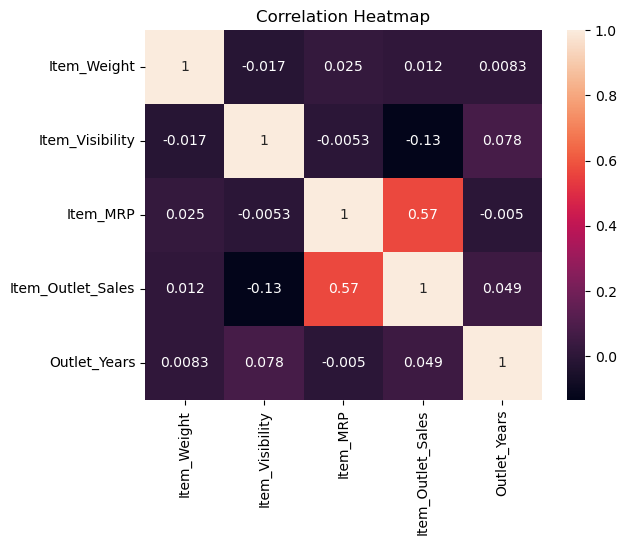

In [33]:
corr_matrix = df1.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap')

In [34]:
X = df1_pre.drop('Item_Outlet_Sales',axis=1)
Y = df['Item_Outlet_Sales']

In [35]:
import sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [36]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6818, 20), (1705, 20), (6818,), (1705,))

In [37]:
x_train.sort_index(ascending=True, inplace=True)
x_test.sort_index(ascending=True, inplace=True)
y_train.sort_index(ascending=True, inplace=True)
y_test.sort_index(ascending=True, inplace=True)

In [38]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

Mean Squared Error: 1140754.8827394191
R-squared (R2) Score: 0.580291594543052


<Axes: title={'center': 'Model Coefficients'}>

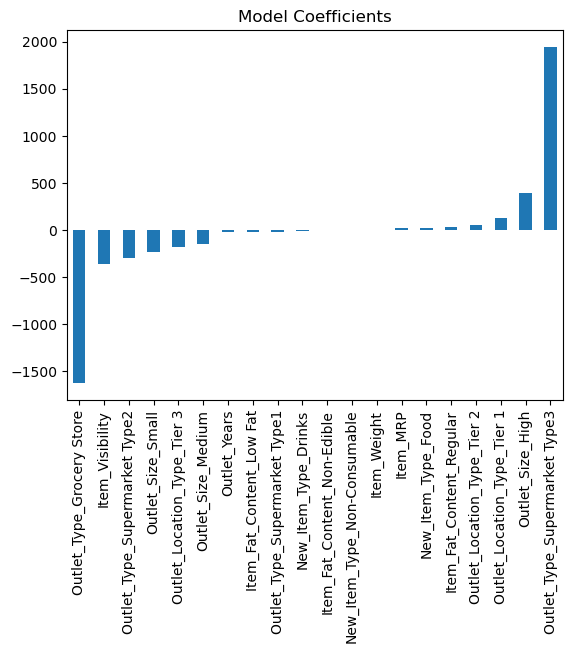

In [39]:
model = LinearRegression()

# Fit the model to the training data
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred2 = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)
print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

In [40]:
import statsmodels.api as sm
MLR_model1 = sm.OLS(y_train,x_train).fit()
MLR_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     614.5
Date:                Wed, 11 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:17:17   Log-Likelihood:                -57682.
No. Observations:                6818   AIC:                         1.154e+05
Df Residuals:                    6803   BIC:                         1.155e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Item_Weight                      -1.9852      3.290     -0.603      0.546      -8.436       4.465
Item_Visibility                -366.2037    300.792     -1.217      0.223    -955.850     223.442
Item_MRP                         15.6458      0.222     70.496      0.000      15.211      16.081
Outlet_Years                    -21.7326     11.777     -1.845      0.065     -44.819       1.354
Item_Fat_Content_Low Fat         95.0817     70.351      1.352      0.177     -42.828     232.991
Item_Fat_Content_Non-Edible     108.8041     69.753      1.560      0.119     -27.933     245.541
Item_Fat_Content_Regular        140.3275     70.924      1.979      0.048       1.295     279.360
Outlet_Size_High                505.0416    265.383      1.903      0.057     -15.193    1025.276
Outlet_Size_Medium              -40.0394     55.684     -0.719      0.472    -149.197      69.118
Outlet_Size_Small              -120.7888     41.245     -2.929      0.003    -201.642     -39.935
Outlet_Location_Type_Tier 1     245.3949    151.823      1.616      0.106     -52.226     543.016
Outlet_Location_Type_Tier 2     167.5388     79.293      2.113      0.035      12.100     322.978
Outlet_Location_Type_Tier 3     -68.7204     46.266     -1.485      0.137    -159.416      21.975
Outlet_Type_Grocery Store     -1538.5764     86.089    -17.872      0.000   -1707.339   -1369.814
Outlet_Type_Supermarket Type1    67.9757     89.306      0.761      0.447    -107.092     243.043
Outlet_Type_Supermarket Type2  -215.2125     68.830     -3.127      0.002    -350.142     -80.283
Outlet_Type_Supermarket Type3  2030.0265    250.536      8.103      0.000    1538.897    2521.156
New_Item_Type_Drinks            101.4237     75.238      1.348      0.178     -46.066     248.914
New_Item_Type_Food              133.9856     71.086      1.885      0.059      -5.366     273.337
New_Item_Type_Non-Consumable    108.8041     69.753      1.560      0.119     -27.933     245.541
==============================================================================
Omnibus:                      753.014   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1777.928
Skew:                           0.657   Prob(JB):                         0.00
Kurtosis:                       5.129   Cond. No.                     5.69e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.13e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Mean Squared Error: 1140754.8827394187
R-squared (R2) Score: 0.5802915945430522


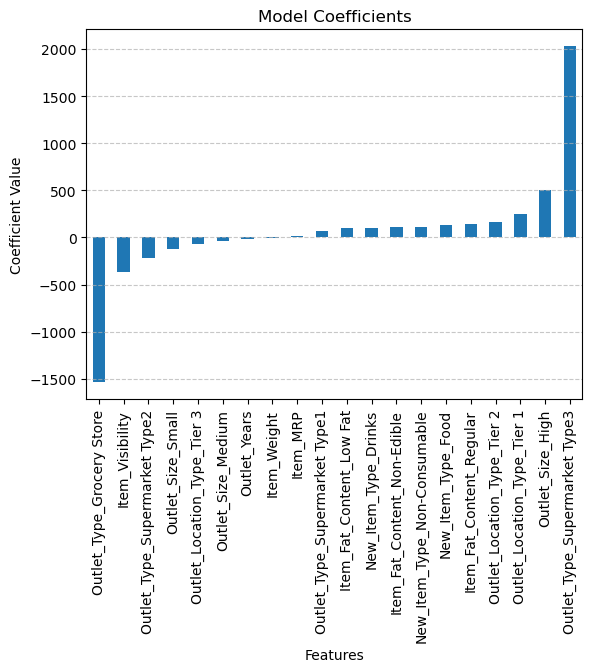

In [41]:
y_test_pred = MLR_model1.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

coefficients = MLR_model1.params

# Sort the coefficients
coefficients_sorted = coefficients.sort_values()

# Create a bar chart for the coefficients
coefficients_sorted.plot(kind='bar', title="Model Coefficients")
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Mean Squared Error: 1182623.7685137228
R-squared (R2) Score: 0.5648871254914773


<Axes: title={'center': 'Feature Importance'}>

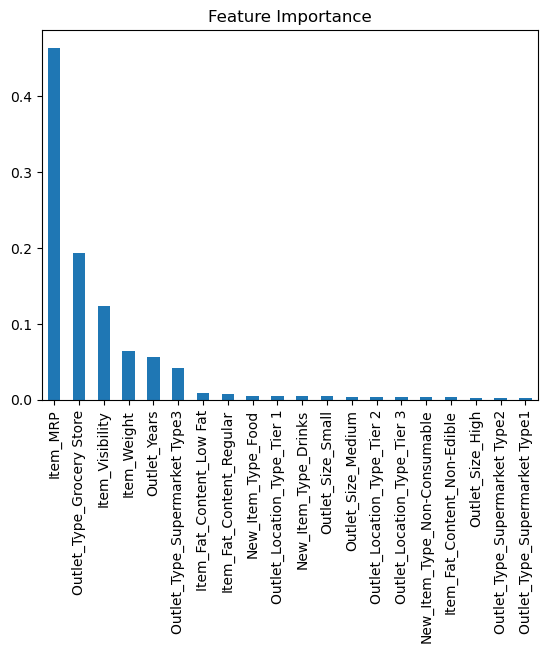

In [42]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred1 = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)
print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")